# ▒ 앙상블 ▒

## 0. 환경설정

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
#from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

## 1. 데이터 불러오기

### Boston Housing Dataset

- 보스턴 주택 가격 데이터
- 1978년에 발표된 데이터로 미국 보스턴 지역의 주택 가격에 영향을 미치는 요소들을 정리
- 총 13가지의 요소들과 주택 가격으로 이루어져 있음.

### 데이터 호출

In [2]:
boston = load_boston()

X_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
y_boston = pd.DataFrame(boston.target, columns=['MEDV']).iloc[:,0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

### 데이터 분할
- Training set 70%, Test set 30% 무작위 추출을 이용하여 나누기


In [3]:
X_train, X_test, y_train, y_test = \
train_test_split(X_boston, y_boston, 
                 test_size = 0.3, random_state=123)

## 2. 앙상블

### 2.0 Decision Tree

In [4]:
tree = DecisionTreeRegressor(max_depth = 5,
                             random_state = 0)
tree.fit = tree.fit(X_train, y_train)

### 예측

In [5]:
tree_pred = tree.predict(X_test)
print((y_test-tree_pred).pow(2).mean())

17.602204873990754


### 2.1 Bagging

### 모형적합
- n_estimators : bootstrap의 개수 (bootstrap의 개수는 충분히 크게 하는것이 좋다.)

In [6]:
tree = DecisionTreeRegressor()
bag_model = BaggingRegressor(tree, n_estimators=1000, 
                             max_samples=0.8, random_state=1)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=1000, random_state=1)

### 예측

In [7]:
bag_pred = bag_model.predict(X_test)
print((y_test-bag_pred).pow(2).mean())

14.551381714144748


### 2.2 Random Forest

### 모형적합

In [8]:
rf_model = RandomForestRegressor(n_estimators = 1000,
                                  max_features = 3,
                                  min_samples_leaf = 3)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features=3, min_samples_leaf=3, n_estimators=1000)

### 예측

In [9]:
rf_pred = rf_model.predict(X_test)
print((y_test-rf_pred).pow(2).mean())

16.495467454916525


### 2.3 Boosting

### 모형적합

In [10]:
gbm_model = GradientBoostingRegressor(n_estimators = 1000,
                                      max_depth = 3)
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=1000)

### 예측

In [11]:
gbm_pred = gbm_model.predict(X_test)
print((y_test-gbm_pred).pow(2).mean())

13.29322921553449


### Partial Dependence Plot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


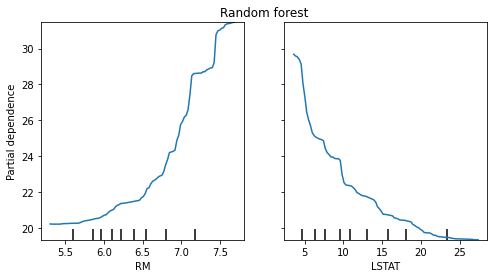

In [12]:
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_title("Random forest", fontsize=12)
tree_disp = plot_partial_dependence(rf_model, X_train, ["RM","LSTAT"], ax=ax)

### Variable Importance Plot

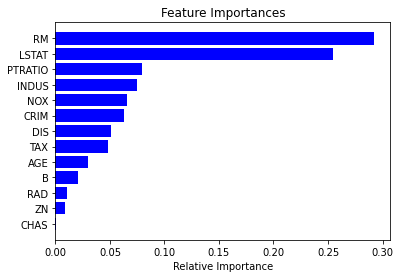

In [13]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [boston.feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.
